In [1]:
# importción de librerías

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## Fase 1. Exploración y limpieza.
## Exploración inicial : 1º CSV : " Customer Flight Activity " 

In [2]:
# Utilizo pandas para leer el 1º csv, sin index_col=0 para índice) y revisar 5 primeras filas

df_customer_flight_activity = pd.read_csv('../archivos/Customer Flight Activity.csv.')
df_customer_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
# visión de 5 ultimas filas
df_customer_flight_activity.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [4]:
# visión de 8 filas aleatorias
df_customer_flight_activity.sample(8)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
48874,902200,2017,3,0,0,0,0,0.0,0,0
209339,448136,2018,1,7,0,7,3052,305.0,0,0
67605,100102,2017,5,0,0,0,0,0.0,0,0
271218,142371,2018,5,0,0,0,0,0.0,0,0
120156,199513,2017,8,0,0,0,0,0.0,0,0
238867,619141,2017,9,0,0,0,0,0.0,0,0
73497,415916,2017,5,0,0,0,0,0.0,0,0
272964,237492,2018,5,0,0,0,0,0.0,0,0


In [5]:
# Exploración de columnas: 
print(f"Las columnas son: {df_customer_flight_activity.columns}")

Las columnas son: Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [6]:
# Exploración de nº de filas y columnas:
print(f"El número de filas que tenemos es {df_customer_flight_activity.shape[0]}, y el número de columnas es {df_customer_flight_activity.shape[1]}.")

El número de filas que tenemos es 405624, y el número de columnas es 10.


In [7]:
# Información general del Dataframe.
df_customer_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
# En el output anterior, no hay valores nulos pero comprobamos mediante metodo especifico los totales en cada columna
df_customer_flight_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [9]:
# Exploración columnas categóricas, conteo, valores únicos, top y frecuencia: No realizo ya que todas las columnas son nuericas 
# Exploración de datos principales estadísticos :
df_customer_flight_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [10]:
# Comprobación de duplicados
print(f"El número de filas duplicadas son: {df_customer_flight_activity.duplicated().sum()}")

El número de filas duplicadas son: 1864


In [11]:
# Compruebo duplicados para entender si son filas totalmente duplicadas o no, filtro por la columna "Loyalty Number" porque es un identificador unico de cliente

df_duplicados = df_customer_flight_activity[df_customer_flight_activity.duplicated(subset=['Loyalty Number'])]
df_duplicados.head(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
37,100504,2017,2,0,0,0,0,0.00,0,0
39,100504,2017,3,0,0,0,0,0.00,0,0
42,101902,2017,1,0,0,0,0,0.00,0,0
88,100504,2017,4,0,0,0,0,0.00,0,0
101,100504,2017,5,0,0,0,0,0.00,0,0
115,106001,2017,1,5,0,5,910,91.00,0,0
124,100504,2017,6,0,0,0,0,0.00,0,0
125,100504,2017,7,0,0,0,0,0.00,0,0
144,107119,2017,1,8,4,12,2508,250.00,0,0
150,100504,2017,8,10,4,14,966,96.00,0,0


Los duplicados que tengo por la columna Loyalty Number se mantienen ya que en esas filas de duplicados, hay datos diferentes en otras columnas. 

In [12]:
#Exploración de la cantidad de valores únicos en cada columna
df_customer_flight_activity.nunique()

Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

In [13]:
# Exploración de los valores unicos

def cust_flight_act_unicos(df_customer_flight_activity):
    for columna in df_customer_flight_activity.columns:
        valor_unico=df_customer_flight_activity[columna].unique()
        total_unicos=len(valor_unico)

        print(f"Columna : {columna}")
        print(f"Los valores unicos son: {valor_unico}")
        print(f"Total valores unicos : {total_unicos}")
        print("---------------------------")

cust_flight_act_unicos(df_customer_flight_activity)

Columna : Loyalty Number
Los valores unicos son: [100018 100102 100140 ... 999731 999788 999891]
Total valores unicos : 16737
---------------------------
Columna : Year
Los valores unicos son: [2017 2018]
Total valores unicos : 2
---------------------------
Columna : Month
Los valores unicos son: [ 1  9  2  3 11  4  5  7  6  8 10 12]
Total valores unicos : 12
---------------------------
Columna : Flights Booked
Los valores unicos son: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
Total valores unicos : 22
---------------------------
Columna : Flights with Companions
Los valores unicos son: [ 0  4  7  1  6  3  5  2 10  8  9 11]
Total valores unicos : 12
---------------------------
Columna : Total Flights
Los valores unicos son: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
Total valores unicos : 33
---------------------------
Columna : Distance
Los valores unicos son: [1521 2030 1200 ... 1217  617 4135]
Total 

## Exploración inicial : 2º CSV : " Customer Loyalty History " 

In [14]:
# Utilizo pandas para leer el 2º csv, sin index_col=0 para índice) y revisar 5 primeras filas

df_customer_loyalty_history = pd.read_csv('../archivos/Customer Loyalty History.csv')
df_customer_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [15]:
# visión de 5 ultimas filas
df_customer_loyalty_history.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [16]:
# visión de 8 filas aleatorias
df_customer_loyalty_history.sample(8)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11565,578013,Canada,Ontario,Ottawa,K1F 2R2,Male,College,NaN,Single,Star,2678.46,Standard,2015,5,NaN,NaN
113,967300,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,62630.0,Single,Aurora,6364.90,2018 Promotion,2018,3,2018.0,11.0
10839,343879,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,64001.0,Single,Star,2514.59,Standard,2017,12,NaN,NaN
1151,591579,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,51785.0,Single,Aurora,5406.88,Standard,2018,8,NaN,NaN
5548,515444,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Single,Nova,3979.59,Standard,2018,5,NaN,NaN
6103,331669,Canada,Quebec,Montreal,H2T 9K8,Female,College,NaN,Single,Nova,4787.21,Standard,2017,2,2017.0,10.0
9393,329910,Canada,Prince Edward Island,Charlottetown,C1A 6E8,Female,Bachelor,81865.0,Divorced,Nova,17557.54,Standard,2018,6,NaN,NaN
11895,516255,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,62075.0,Single,Star,2816.57,Standard,2013,6,NaN,NaN


In [17]:
# Exploración de columnas: 
print(f"Las columnas son: {df_customer_loyalty_history.columns}")

Las columnas son: Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


In [18]:
# Exploración de nº de filas y columnas:
print(f"El número de filas que tenemos es {df_customer_loyalty_history.shape[0]}, y el número de columnas es {df_customer_loyalty_history.shape[1]}.")

El número de filas que tenemos es 16737, y el número de columnas es 16.


In [19]:
# Información general del Dataframe.
df_customer_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [20]:
# Exploración de valores nulos totales en cada columna. Hay 3 columnas con valores nulos 
df_customer_loyalty_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [21]:
# Al haber nulos, compruebo % en todo el dataframe y filtro para ver el porcentaje del conteo/sumatorio de nulos

df_nulos = pd.DataFrame((df_customer_loyalty_history.isnull().sum() / df_customer_loyalty_history.shape[0]) * 100, columns = ["%_nulos"]).round(2)
df_nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.32
Cancellation Year,87.65
Cancellation Month,87.65


In [22]:
# Exploración columnas categóricas, conteo, valores únicos, top y frecuencia

df_customer_loyalty_history.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [23]:
#  datos principales estadísticos :
df_customer_loyalty_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [24]:
# Comprobación de duplicados
print(f"El número de filas duplicadas son: {df_customer_loyalty_history.duplicated().sum()}")

El número de filas duplicadas son: 0


In [25]:
# Exploración de todos los valores unicos en cada columna

def cust_loyalty_history(df_customer_loyalty_history):
    for columna in df_customer_loyalty_history.columns:
        valor_unico=df_customer_loyalty_history[columna].unique()
        total_unicos=len(valor_unico)

        print(f"Columna : {columna}")
        print(f"Los valores unicos son: {valor_unico}")
        print(f"Total valores unicos : {total_unicos}")
        print("---------------------------")

cust_loyalty_history(df_customer_loyalty_history)

Columna : Loyalty Number
Los valores unicos son: [480934 549612 429460 ... 776187 906428 652627]
Total valores unicos : 16737
---------------------------
Columna : Country
Los valores unicos son: ['Canada']
Total valores unicos : 1
---------------------------
Columna : Province
Los valores unicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Total valores unicos : 11
---------------------------
Columna : City
Los valores unicos son: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Total valores unicos : 29
---------------------------
Columna : Postal Code
Los valores unicos son: ['M2Z 4K1' '

## Transformación y limpieza datos:  Customer Flight Activity 

In [26]:

# Cambio de datos --> float

columnas_float = ['Distance', 'Points Redeemed', 'Dollar Cost Points Redeemed']

df_customer_flight_activity[columnas_float] = df_customer_flight_activity[columnas_float].astype(float)
df_customer_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  float64
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  float64
 9   Dollar Cost Points Redeemed  405624 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 30.9 MB


## Transformación y limpieza datos:  Customer Loyalty History 

In [27]:
# La columna "Salary" tiene valores negativos, no veo ninguna relación con otras columnas, con lo que tiene que ser un error de signo, cambio el valor a positivo:

df_customer_loyalty_history['Salary'] = df_customer_loyalty_history['Salary'].apply(lambda x: -x if x < 0 else x)

df_customer_loyalty_history['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

1.- Valores nulos:
    a) Las columnas Cancellation Year y Cancellation Month tienen el mismo porcentaje de nulos, clientes que no han cancelado su membresia, logicamente no tiene dato. 
    b) "Salary"

In [28]:
# Reviso los porcentajes de nulos y estudiar que hacer: 

filas_totales =len(df_customer_loyalty_history)
recuento_nulos_df = df_customer_loyalty_history.isnull().sum()
total_recuento_nulos= recuento_nulos_df[recuento_nulos_df > 0]
porc_nulos = (total_recuento_nulos/ filas_totales) * 100
porc_nulos

Salary                25.321145
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [29]:
# Calculo media y mediana y con describe, observo los valores 
salary_med = df_customer_loyalty_history['Salary'].describe()[['mean', "50%"]]
salary_med

mean    79359.340907
50%     73455.000000
Name: Salary, dtype: float64

La media, es mayor que la mediana, con lo que predominan salarios altos, no debemos tratar los nulos con la media, podriamos tratarlos con la mediana.

In [30]:
# Relaciono "Salary", con "Education", podría tener relación para analizar los nulos. Para ello tengo si agrupo por clases el salario:
#   Detecto que el nivel College, viendo en el siguiente output que son 4238 nulos, coincide con Salary, con lo que no voy a tratarlo con la mediana anterior.

df_customer_loyalty_history.groupby("Education")["Salary"].count()

Education
Bachelor                10475
College                     0
Doctor                    734
High School or Below      782
Master                    508
Name: Salary, dtype: int64

In [31]:
education_counts = df_customer_loyalty_history['Education'].value_counts()

print(education_counts)

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64


In [32]:
# La Categoría College está entre Bachelor y Hig School or Below. Observo max,min, media, mediana de salarios en estas categorias para cumplimentar los nulos de Salary/College.


In [33]:
# La categoría College está entre Bachelor y Hig School or Below. Observo max,min, media, mediana de salarios en estas categorias para cumplimenta

df_customer_loyalty_history.groupby('Education')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


In [34]:
# Por lógica, el valor nulo de Salary en la cagegoria de "Education" --> "College" al estar entre Bachelor y High School or Below, imputo la media entre ambas categorias.
# Tengo que acceder a los datos de la fila, que son unicos, no estan los 2 en la fila. (| - &)

bach_hs = (df_customer_loyalty_history[(df_customer_loyalty_history['Education'] == 'Bachelor') | (df_customer_loyalty_history['Education'] == 'High School or Below')]['Salary'])
media_bach_hs= bach_hs.mean().round(2)
print(media_bach_hs)

71786.84


In [35]:
df_customer_loyalty_history.loc[(df_customer_loyalty_history['Education'] == 'College') & (df_customer_loyalty_history['Salary'].isnull()), 'Salary'] = media_bach_hs


In [36]:
# Comprobación Salary no tenga nulos

df_customer_loyalty_history['Salary'].isnull().sum()

np.int64(0)

## Unión de dataframes 

In [37]:
# Archivo los nuevos csv con los cambios realizados en nueva variable para utilizarlo en la unión.

df_customer_loyalty_history.to_csv('../archivos/Customer_Loyalty_History_Actualizado.csv')
df_customer_flight_activity.to_csv('../archivos/Customer_Flight_activity_Actualziado.csv')

In [38]:
df_aerolinea = pd.merge(df_customer_flight_activity, df_customer_loyalty_history, on="Loyalty Number", how='inner')
df_aerolinea

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521.0,152.0,0.0,0.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030.0,203.0,0.0,0.0,Canada,Ontario,Toronto,M1R 4K3,Male,College,71786.84,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200.0,120.0,0.0,0.0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,71786.84,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0.0,0.0,0.0,0.0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0.0,0.0,0.0,0.0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0.0,0.0,0.0,0.0,Canada,Ontario,Toronto,M1R 4K3,Male,College,71786.84,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0.0,0.0,0.0,0.0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.00,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233.0,123.0,0.0,0.0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.00,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0.0,0.0,0.0,0.0,Canada,British Columbia,Victoria,V10 6T5,Male,College,71786.84,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [39]:
df_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  float64
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  float64
 9   Dollar Cost Points Redeemed  405624 non-null  float64
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

## Fase 2: Visualización

In [40]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? (Los valores unicos son: [2016 2014 2013 2012 2015 2018 2017])
# Mediante groupby agrupamos para ver que años tenemos datos : 2017-2018

df_reservas = df_aerolinea.groupby('Year')[['Flights Booked']].sum()
df_reservas

#creo un DF solo con las columnas que necesito para el año 2017

df_reservas2017 = df_aerolinea[df_aerolinea['Year'] == 2017][["Year", 'Month', 'Flights Booked']]
df_reservas2017

#Agrupo los vuelos reservados por mes para su visualización 

,Year,Month,Flights Booked
0,2017,1,3
1,2017,1,10
2,2017,1,6
3,2017,1,0
4,2017,1,0
...,...,...,...
405484,2017,12,0
405488,2017,6,12
405530,2017,3,10
405564,2017,1,8


In [41]:
# Agrupo las reservas por meses en un df para tener agrupado en números totales y necesario para la visualización (df)

mes_total2017 = df_reservas2017.groupby('Month')['Flights Booked'].sum().reset_index()
mes_total2017

,Month,Flights Booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


In [42]:
#  2º importación por no reconocer 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

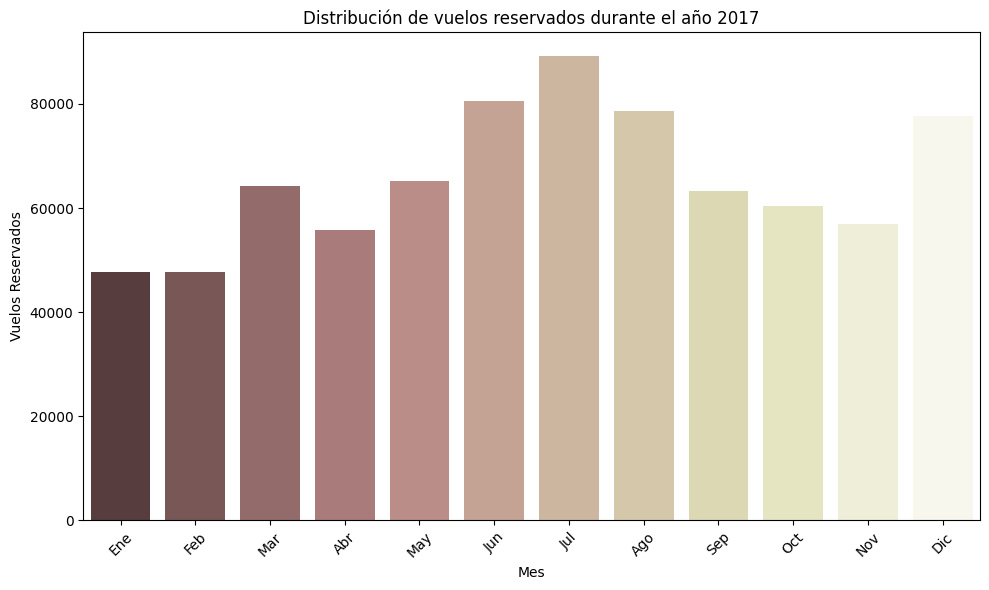

In [43]:

# visualización en gráfico de barras

plt.figure(figsize=(10, 6))
sns.barplot(x='Month',
            y='Flights Booked',
            data=mes_total2017,
            palette='pink')

# Etiquetas y título
plt.title('Distribución de vuelos reservados durante el año 2017')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')

# Etiquetas de los meses
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [44]:
# Total de reservas por mes en el año 2018
df_reservas_totales2018 = df_aerolinea[df_aerolinea['Year']==2018][['Month', 'Flights Booked']]
df_reservas_totales2018

,Month,Flights Booked
27,9,8
87,11,7
102,7,12
132,11,10
165,9,11
...,...,...
405619,12,0
405620,12,0
405621,12,3
405622,12,0


In [45]:
mes_total2018 = df_reservas_totales2018.groupby('Month')['Flights Booked'].sum().reset_index()
mes_total2018

,Month,Flights Booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


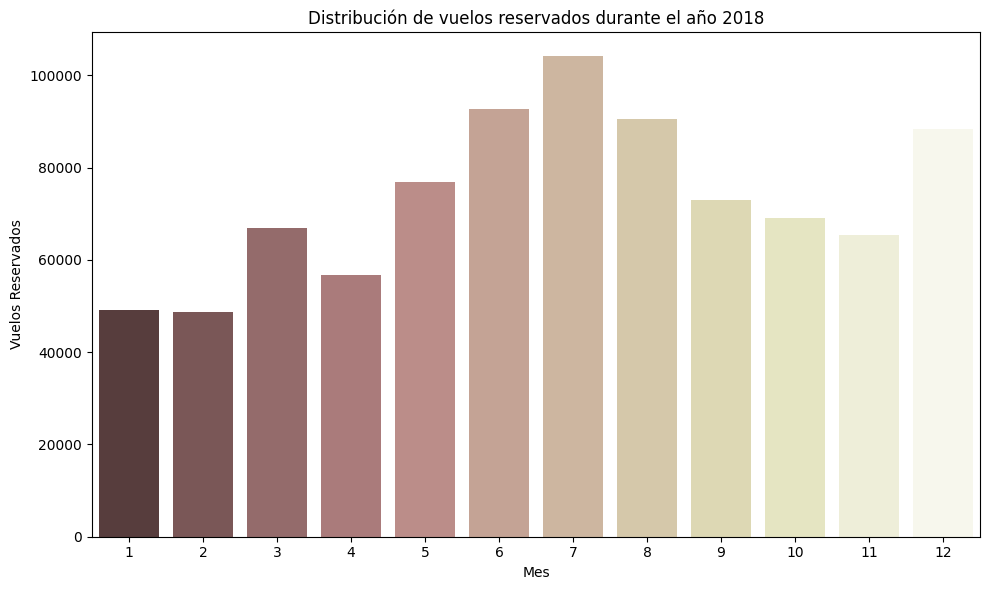

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month',
            y='Flights Booked',
            data=mes_total2018,
            palette='pink')

plt.title('Distribución de vuelos reservados durante el año 2018')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')



plt.tight_layout()
plt.show()

Si observamos las 2 gráficas del 2017 y 2018, se puede observar que su comportamiento a lo largo del año es muy similar, destacando una subida de reservas en los meses de verano, y a partir de agosto comienzan a bajar las reservas. A finales de año, de nuevo hay un repunte de reservas. 
 Además el 2018 Vs 2017 tiene un numero mayor de reservas el 2018 con respecto al año anterior. 

In [ ]:
# 2.- Visualización ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
# Filtrado de df por distancia de vuelos y puntos acumulados

df_distanc_puntos = df_aerolinea[['Distance', 'Points Accumulated']].reset_index()
df_distanc_puntos

,index,Distance,Points Accumulated
0,0,1521,152.0
1,1,2030,203.0
2,2,1200,120.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
405619,405619,0,0.0
405620,405620,0,0.0
405621,405621,1233,123.0
405622,405622,0,0.0


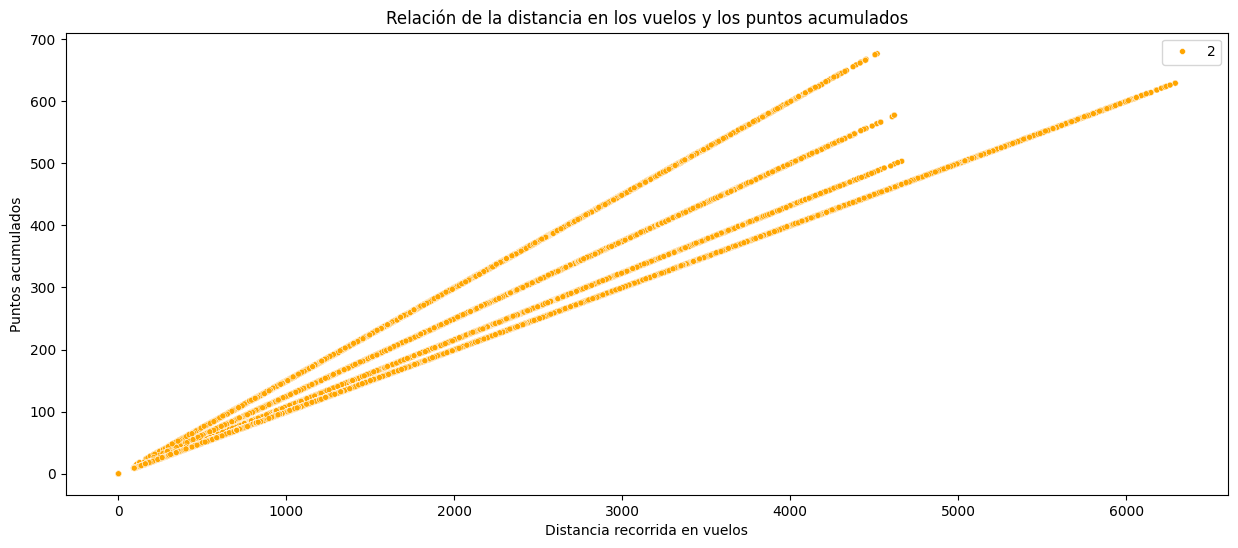

In [ ]:

plt.figure(figsize = (15, 6))
sns.scatterplot(x = "Distance",
                y = "Points Accumulated",
                  data = df_distanc_puntos,
                    color="orange", size=2)

plt.title("Relación de la distancia en los vuelos y los puntos acumulados")
plt.xlabel("Distancia recorrida en vuelos")
plt.ylabel("Puntos acumulados");



En esta gráfica podemos observar que hay una gran relación lineal positiva entre las dos variables, cuantos más Kilometros, mas puntos acumulados.

In [ ]:
# 3 . ¿Cuál es la distribución de los clientes por provincia o estado?
# Filtrado y agrupación  de df por clientes y provincia --> valores unicos output 11

df_ctes_prov = df_aerolinea.groupby('Province')['Loyalty Number'].count().reset_index()
df_ctes_prov

,Province,Loyalty Number
0,Alberta,23400
1,British Columbia,106848
2,Manitoba,15984
3,New Brunswick,15432
4,Newfoundland,6312
5,Nova Scotia,12576
6,Ontario,130896
7,Prince Edward Island,1584
8,Quebec,79968
9,Saskatchewan,9936


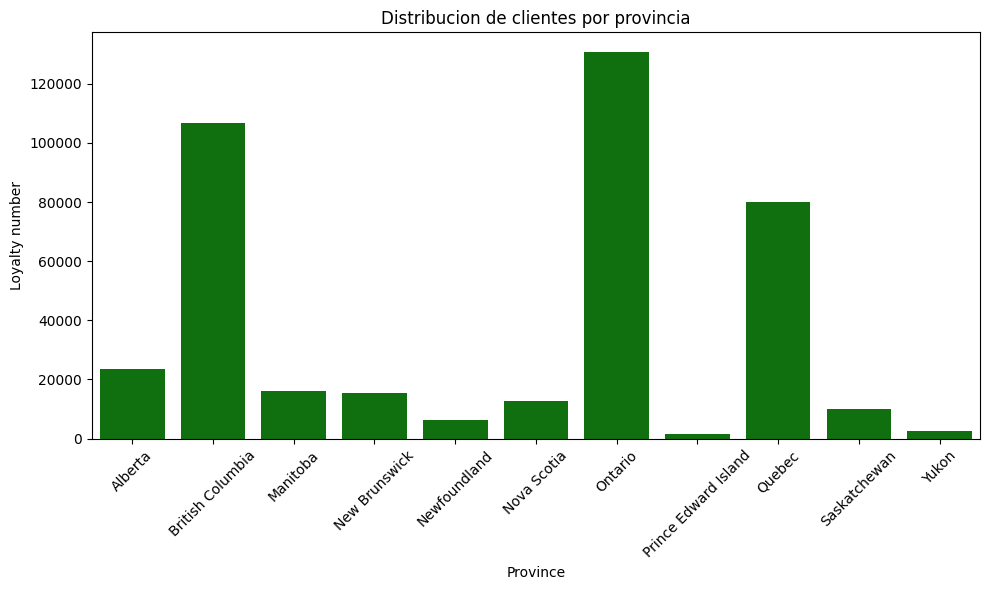

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Province', 
            y='Loyalty Number',
            data=df_ctes_prov,
            color='green')


plt.title('Distribucion de clientes por provincia')
plt.xlabel('Province')
plt.ylabel('Loyalty number')


plt.xticks(ticks=range(11), labels=['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon'], rotation=45)

plt.tight_layout()
plt.show()

En esta gráfica se observa que la mayoria de los clientes tienen su residencia en las principales ciudades de Canadá : British Columbia, Ontario y Quebec, bajando considerablemente la residencia de nuestros clientes en el resto de ciudades de unos 80.000 a casi 20.000 y decreciendo en el resto.

In [ ]:
# 4.- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
# Filtrado y agrupación del df por Educacion y Salario. El salario promedio es la media por cada categoria
salario_educ = df_aerolinea.groupby('Education')['Salary'].mean().reset_index().round(2)

salario_educ

,Education,Salary
0,Bachelor,72601.24
1,College,71786.84
2,Doctor,178335.44
3,High School or Below,61112.38
4,Master,103767.49


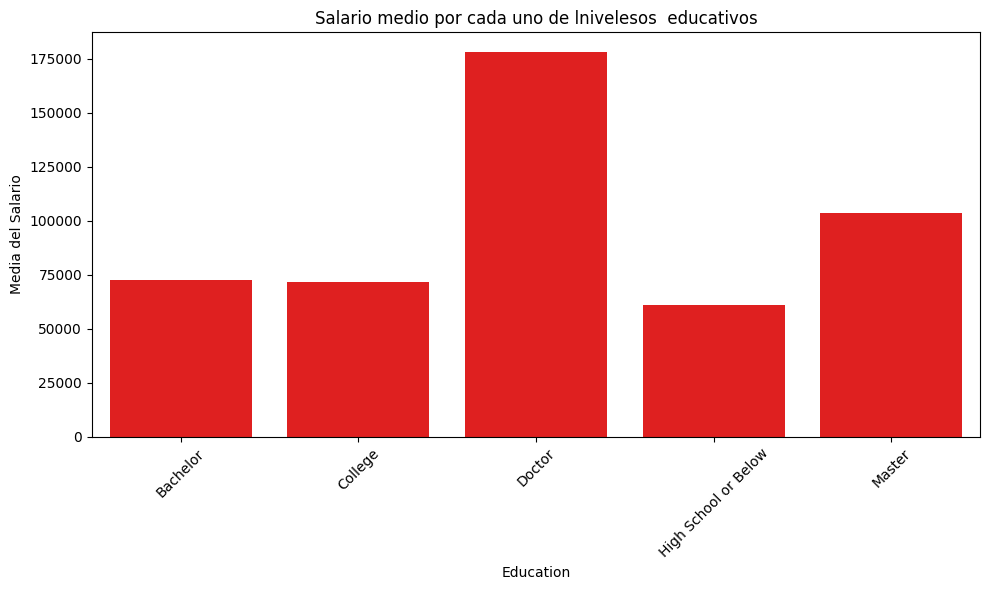

In [ ]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', 
            y='Salary',
            data= salario_educ,
            color='red')

plt.title('Salario medio por cada uno de lnivelesos  educativos')
plt.xlabel('Education')
plt.ylabel('Media del Salario')

plt.xticks(ticks=range(5), labels=['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'], rotation=45)
plt.tight_layout()
plt.show()

En esta gráfica se puede observar que las 2 categorias educativas mayores, son las que tienen mayores ingresos, por el contrario, como menr es High School estando entre las otras 2 categorias. 

In [ ]:
# ¿Cual es la proporción de los clientes con diferentes tipos de tarjetas de fidelidad?
# Filtro el df y agrupo las categorias de tarjetas por los clientes

df_tarj_ctes= df_aerolinea.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
df_tarj_ctes

,Loyalty Card,Loyalty Number
0,Aurora,83832
1,Nova,137568
2,Star,184224


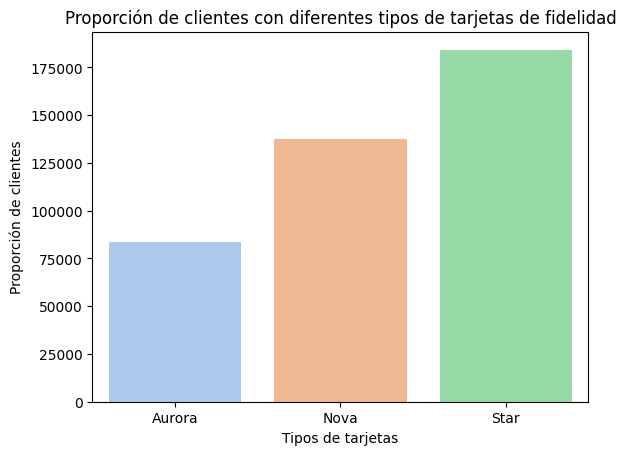

In [ ]:
#d. Gráfico
sns.barplot(x="Loyalty Card",
             y="Loyalty Number",
               data=df_tarj_ctes,
               palette="pastel")

plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad")
plt.xlabel("Tipos de tarjetas")
plt.ylabel("Proporción de clientes");

En esta gráfica se puede observar que la mayoria de nuetros clientes tienen el tipo de Tarjeta Star.

In [ ]:
#¿Como se distribuyen los clientes según su estado civil y genero?
# Filtro y agrupo df por estado civil y género.
#.nunique para contar el numero de valores unicos el agrupado creado.


estado_genero = df_aerolinea.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()
estado_genero

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


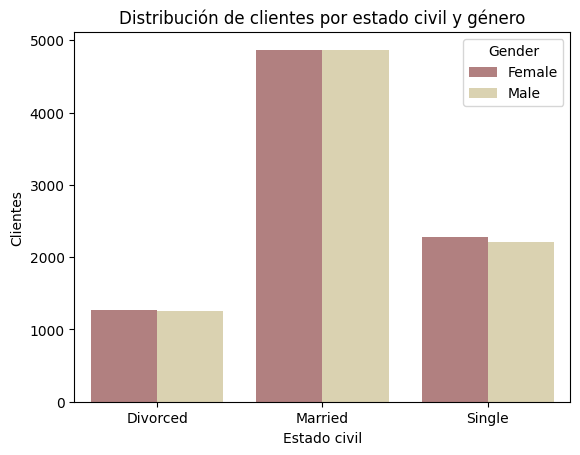

In [ ]:
sns.barplot(x="Marital Status",
            y="Loyalty Number",
            hue="Gender",
            data=estado_genero,
            palette="pink")


plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Clientes");

En esta gráfica se puede observar que es similar la distribución de clientes por estado civil y género. 